### Personal work can be found under ["On your Own"](#onyourown)

# Introduction to data

Some define **Statistics** as the field that focuses on turning information into knowledge. The first step in that process is to summarize and describe the raw information - the data. In this lab, you will gain insight into public health by generating simple graphical and numerical summaries of a data set collected by the Centers for Disease Control and Prevention (CDC). As this is a large data set, along the way you'll also learn the indispensable skills of data processing and subsetting.

## Getting started

The Behavioral Risk Factor Surveillance System (BRFSS) is an annual telephone survey of 350,000 people in the United States. As its name implies, the BRFSS is designed to identify risk factors in the adult population and report emerging health trends. For example, respondents are asked about their diet and weekly physical activity, their HIV/AIDS status, possible tobacco use, and even their level of healthcare coverage. The BRFSS Web site (http://www.cdc.gov/brfss) contains a complete description of the survey, including the research questions that motivate the study and many interesting results derived from the data.

We will focus on a random sample of 20,000 people from the BRFSS survey conducted in 2000. While there are over 200 variables in this data set, we will work with a small subset.

We begin by importing the dataset of 20,000 observations from the Cloud.

In [1]:
# for Mac OS users only!
# if you run into any SSL certification issues, 
# you may need to run the following command for a Mac OS installation.
# $/Applications/Python 3.x/Install Certificates.command
import os, ssl
if (not os.environ.get('PYTHONHTTPSVERIFY', '') and
    getattr(ssl, '_create_unverified_context', None)): 
    ssl._create_default_https_context = ssl._create_unverified_context

In [2]:
import pandas as pd

cdc = pd.read_csv('https://www.openintro.org/stat/data/cdc.csv')
cdc

,genhlth,exerany,hlthplan,smoke100,height,weight,wtdesire,age,gender
0,good,0,1,0,70,175,175,77,m
1,good,0,1,1,64,125,115,33,f
2,good,1,1,1,60,105,105,49,f
3,good,1,1,0,66,132,124,42,f
4,very good,0,1,0,61,150,130,55,f
5,very good,1,1,0,64,114,114,55,f
6,very good,1,1,0,71,194,185,31,m
7,very good,0,1,0,67,170,160,45,m
8,good,0,1,1,65,150,130,27,f
9,good,1,1,0,70,180,170,44,m


The data set `cdc` that shows up is a data matrix, with each row representing a case and each column representing a variable. These kind of data format are called data frame, which is a term that will be used throughout the labs.

To view the names of the variables, use `columns.values`

In [3]:
cdc.columns.values

array(['genhlth', 'exerany', 'hlthplan', 'smoke100', 'height', 'weight',
       'wtdesire', 'age', 'gender'], dtype=object)

This returns the names `genhlth`, `exerany`, `hlthplan`, `smoke100`, `height`, `weight`, `wtdesire`, `age`, and `gender`. Each one of these variables corresponds to a question that was asked in the survey. For example, for `genhlth`, respondents were asked to evaluate their general health, responding either excellent, very good, good, fair or poor. The `exerany` variable indicates whether the respondent exercised in the past month (1) or did not (0). Likewise, `hlthplan` indicates whether the respondent had some form of health coverage (1) or did not (0). The `smoke100` variable indicates whether the respondent had smoked at least 100 cigarettes in her lifetime. The other variables record the respondent’s `height` in inches, `weight` in pounds as well as their desired weight, `wtdesire`, `age` in years, and `gender`.

<div class = 'exercise'>
<h4>Exercise 1</h4>
How many cases are there in this data set? How many variables? For each variable, identify its data type (e.g. categorical, discrete).
</div>

We can have a look at the first few entries (rows) of our data with the command

In [4]:
cdc.head()

,genhlth,exerany,hlthplan,smoke100,height,weight,wtdesire,age,gender
0,good,0,1,0,70,175,175,77,m
1,good,0,1,1,64,125,115,33,f
2,good,1,1,1,60,105,105,49,f
3,good,1,1,0,66,132,124,42,f
4,very good,0,1,0,61,150,130,55,f


and similarly we can look at the last few by typing.

In [5]:
cdc.tail()

,genhlth,exerany,hlthplan,smoke100,height,weight,wtdesire,age,gender
19995,good,1,1,0,66,215,140,23,f
19996,excellent,0,1,0,73,200,185,35,m
19997,poor,0,1,0,65,216,150,57,f
19998,good,1,1,0,67,165,165,81,f
19999,good,1,1,1,69,170,165,83,m


You could also look at all of the data frame at once by typing its name into the console, but that might be unwise here. We know `cdc` has 20,000 rows, so viewing the entire data set would mean flooding your screen. It’s better to take small peeks at the data with `head`, `tail` or the subsetting techniques that you’ll learn in a moment.

## Summaries and tables

The BRFSS questionnaire is a massive trove of information. A good first step in any analysis is to distill all of that information into a few summary statistics and graphics. As a simple example, the function `describe` returns a numerical summary: count, mean, standard deviation, minimum, first quartile, median, second quartile, and maximum. For `weight` this is

In [6]:
cdc['weight'].describe()

count    20000.00000
mean       169.68295
std         40.08097
min         68.00000
25%        140.00000
50%        165.00000
75%        190.00000
max        500.00000
Name: weight, dtype: float64

If you wanted to compute the interquartile range for the respondents’ weight, you would look at the output from the summary command above and then enter

In [7]:
190 - 140

50

Python also has built-in functions to compute summary statistics one by one. For instance, to calculate the mean, median, and variance of weight, type

In [8]:
cdc['weight'].mean()
cdc['weight'].var()
cdc['weight'].median()

165.0

While it makes sense to describe a quantitative variable like `weight` in terms of these statistics, what about categorical data? We would instead consider the sample frequency or relative frequency distribution. The function `value_counts` does this for you by counting the number of times each kind of response was given. For example, to see the number of people who have smoked 100 cigarettes in their lifetime, type

In [9]:
cdc['smoke100'].value_counts()

0    10559
1     9441
Name: smoke100, dtype: int64

or instead look at the relative frequency distribution by typing

In [10]:
cdc['smoke100'].value_counts(normalize = True)

0    0.52795
1    0.47205
Name: smoke100, dtype: float64

Notice how Python automatically shows the relative frequency distributions by setting the parameter `normalize` as `True`.

Now let's import `matplotlib` library to create plots. When running Python using the command line, the graphs are typically shown in a separate window. In a Jupyter Notebook, you can simply output the graphs within the notebook itself by running the `%matplotlib` inline magic command.

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline 

You can change the format to svg for better quality figures. You can also try the retina format and see which one looks better on your computer's screen.

In [12]:
%config InlineBackend.figure_format = 'retina'

You can also change the default style of plots. Let's go for our favourite style, `ggplot` from R.

In [13]:
plt.style.use('ggplot')

Let's also make the size of plots bigger.

In [14]:
plt.rcParams['figure.figsize'] = (10,5)

Now we can make a bar plot of the entries in the table by putting the table inside the barplot command.

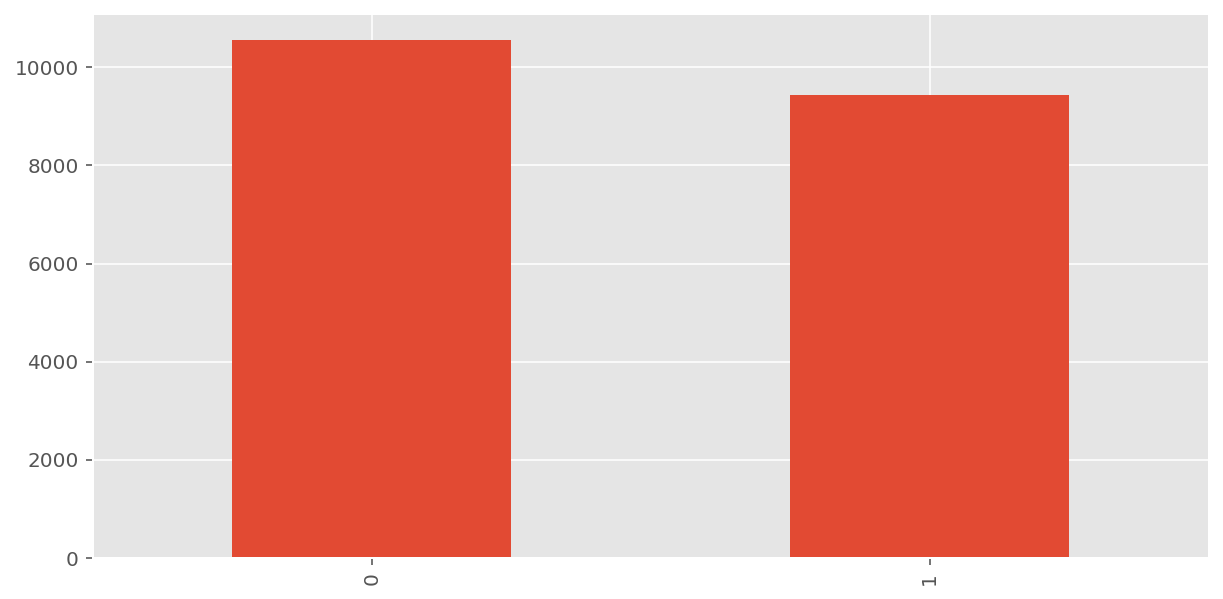

In [15]:
cdc['smoke100'].value_counts().plot(kind = 'bar')
plt.show(); 

Notice what we’ve done here! We created the bar plot using `kind = bar`. You could also break this into two steps by typing the following:

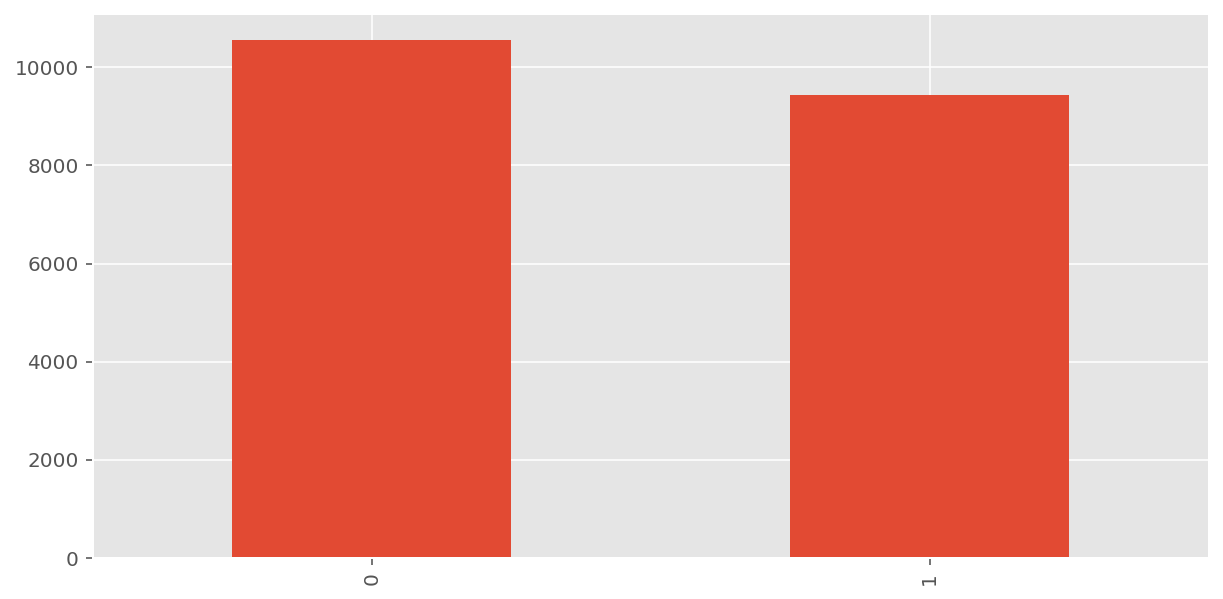

In [16]:
smoke = cdc['smoke100'].value_counts()
smoke.plot(kind = 'bar')
plt.show(); 

Here, we’ve made a new object, called `smoke` (the contents of which we can see by typing `smoke` into the console) and then used it in as the input for `plot`.

<div class = 'exercise'>
<h4>Exercise 2</h4>
Create a numerical summary for `height` and `age`, and compute the interquartile range for each. Compute the relative frequency distribution for `gender` and `exerany`. How many males are in the sample? What proportion of the sample reports being in excellent health?
</div>

The `value_counts()` with `groupby` command can be used to tabulate any number of variables that you provide. For example, to examine which participants have smoked across each gender, we could use the following.

In [17]:
cdc.groupby('gender')['smoke100'].value_counts().unstack() #  By doing unstack we are transforming the last level of the index to the columns. 

smoke100,0,1
gender,,
f,6012,4419
m,4547,5022


Here, we see column labels of 0 and 1. Recall that 1 indicates a respondent has smoked at least 100 cigarettes. The rows refer to gender. To create a mosaic plot of this table, we would enter the following command.

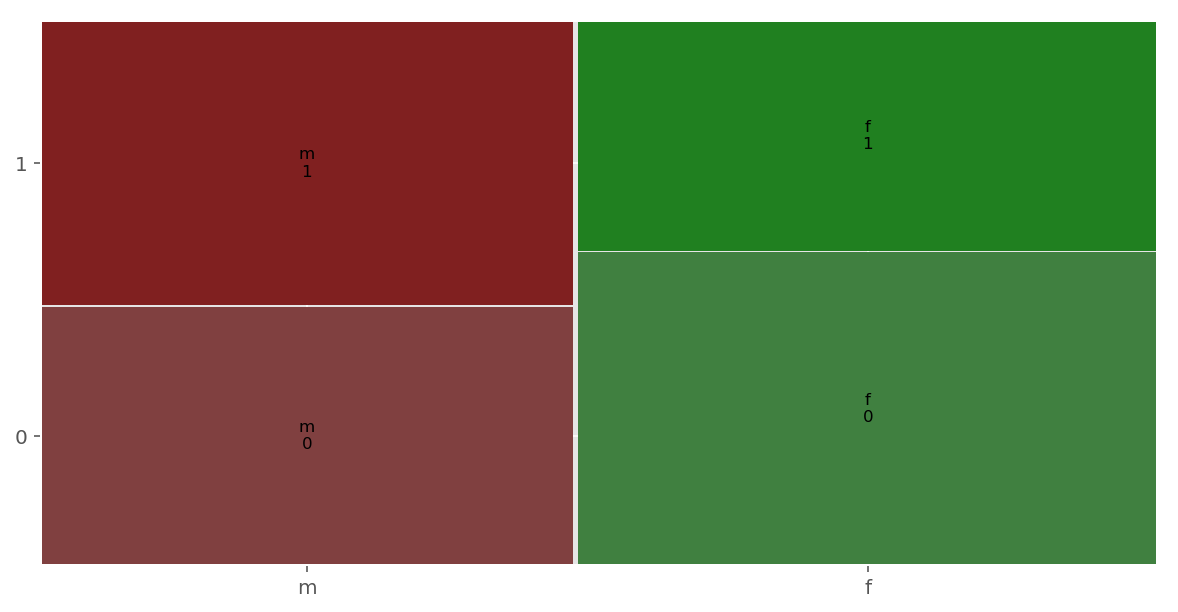

In [18]:
from statsmodels.graphics.mosaicplot import mosaic
mosaic(cdc, ['gender', 'smoke100'])
plt.show();

<div class = 'exercise'>
<h4>Exercise 3</h4>
What does the mosaic plot reveal about smoking habits and gender?
</div>

## Interlude: How Python thinks about data

DataFrames are like a type of spreadsheet. Each row is a different observation (a different respondent) and each column is a different variable (the first is `genhlth`, the second `exerany` and so on). We can see the size of the DataFrame by typing

In [19]:
cdc.shape

(20000, 9)

which will return the number of rows and columns. Now, if we want to access a subset of the full DataFrame, we can use row-and-column notation. For example, to see the sixth variable of the 567th respondent, use the format

In [20]:
cdc.iloc[566,5] # This is the equivalent of cdc[567,6] in R.

160

which gives us the weight of the 567th person (or observation). Remember that, in Python indexing starts at 0, so the first element of a list or DataFrame is selected by the 0-th index.

To see the weights for the first 10 respondents we can type

In [21]:
cdc.iloc[0:10, 5] # Keep in mind that the ending index is excluded in Python.

0    175
1    125
2    105
3    132
4    150
5    114
6    194
7    170
8    150
9    180
Name: weight, dtype: int64

Finally, if we want all of the data for the first 10 respondents, type

In [22]:
cdc.iloc[0:10,]

,genhlth,exerany,hlthplan,smoke100,height,weight,wtdesire,age,gender
0,good,0,1,0,70,175,175,77,m
1,good,0,1,1,64,125,115,33,f
2,good,1,1,1,60,105,105,49,f
3,good,1,1,0,66,132,124,42,f
4,very good,0,1,0,61,150,130,55,f
5,very good,1,1,0,64,114,114,55,f
6,very good,1,1,0,71,194,185,31,m
7,very good,0,1,0,67,170,160,45,m
8,good,0,1,1,65,150,130,27,f
9,good,1,1,0,70,180,170,44,m


By leaving out an index or a range (we didn’t type anything between the comma and the square bracket), we get all the columns. As a rule, we omit the column number to see all columns in a DataFrame. To access all the observations, just leave a colon inside of the bracket. Try the following to see the weights for all 20,000 respondents fly by on your screen

In [23]:
cdc.iloc[:, 5]

0        175
1        125
2        105
3        132
4        150
5        114
6        194
7        170
8        150
9        180
10       186
11       168
12       185
13       170
14       170
15       185
16       156
17       185
18       200
19       125
20       200
21       160
22       160
23       165
24       105
25       190
26       190
27       160
28       115
29       185
        ... 
19970    168
19971     85
19972    145
19973    110
19974    156
19975    230
19976    198
19977    180
19978    135
19979    265
19980    195
19981    210
19982    171
19983    190
19984    180
19985    120
19986    140
19987    200
19988    230
19989    230
19990    195
19991    210
19992    180
19993    165
19994    224
19995    215
19996    200
19997    216
19998    165
19999    170
Name: weight, Length: 20000, dtype: int64

Recall that column 6 represents respondents’ weight, so the command above reported all of the weights in the data set. An alternative method to access the weight data is by referring to the name. Previously, we typed `list(cdc)` to see all the variables contained in the cdc data set. We can use any of the variable names to select items in our data set.

In [24]:
cdc['weight']

0        175
1        125
2        105
3        132
4        150
5        114
6        194
7        170
8        150
9        180
10       186
11       168
12       185
13       170
14       170
15       185
16       156
17       185
18       200
19       125
20       200
21       160
22       160
23       165
24       105
25       190
26       190
27       160
28       115
29       185
        ... 
19970    168
19971     85
19972    145
19973    110
19974    156
19975    230
19976    198
19977    180
19978    135
19979    265
19980    195
19981    210
19982    171
19983    190
19984    180
19985    120
19986    140
19987    200
19988    230
19989    230
19990    195
19991    210
19992    180
19993    165
19994    224
19995    215
19996    200
19997    216
19998    165
19999    170
Name: weight, Length: 20000, dtype: int64

This tells Python to look in DataFrame cdc for the column called weight. Since that’s a single vector, we can subset it by just adding another single index inside square brackets. We see the weight for the 567th respondent by typing

In [25]:
cdc['weight'][566]

160

Similarly, for just the first 10 respondents

In [26]:
cdc['weight'][0:10]

0    175
1    125
2    105
3    132
4    150
5    114
6    194
7    170
8    150
9    180
Name: weight, dtype: int64

The command above returns the same result as the `cdc.iloc[0:10, 5]` command.

## A little more on subsetting

It’s often useful to extract all individuals (cases) in a data set that have specific characteristics. We accomplish this through conditioning commands. First, consider expressions like

In [27]:
cdc['gender'] == 'm'

0         True
1        False
2        False
3        False
4        False
5        False
6         True
7         True
8        False
9         True
10        True
11        True
12        True
13        True
14        True
15        True
16        True
17        True
18        True
19       False
20       False
21       False
22        True
23        True
24       False
25       False
26       False
27       False
28       False
29        True
         ...  
19970     True
19971    False
19972    False
19973    False
19974    False
19975     True
19976    False
19977    False
19978     True
19979     True
19980     True
19981     True
19982    False
19983     True
19984     True
19985    False
19986    False
19987     True
19988     True
19989     True
19990     True
19991     True
19992     True
19993    False
19994     True
19995    False
19996     True
19997    False
19998    False
19999     True
Name: gender, Length: 20000, dtype: bool

or

In [28]:
cdc['age'] > 30

0         True
1         True
2         True
3         True
4         True
5         True
6         True
7         True
8        False
9         True
10        True
11        True
12       False
13        True
14       False
15        True
16        True
17        True
18        True
19        True
20        True
21        True
22        True
23       False
24       False
25        True
26        True
27        True
28        True
29        True
         ...  
19970    False
19971     True
19972     True
19973     True
19974     True
19975     True
19976     True
19977     True
19978     True
19979    False
19980     True
19981     True
19982     True
19983     True
19984     True
19985     True
19986     True
19987     True
19988     True
19989     True
19990     True
19991     True
19992     True
19993     True
19994     True
19995    False
19996     True
19997     True
19998     True
19999     True
Name: age, Length: 20000, dtype: bool

These commands produce a series of `TRUE` and `FALSE` values. There is one value for each respondent, where `TRUE` indicates that the person was male (via the first command) or older than 30 (second command).

Suppose we want to extract just the data for the men in the sample, or just for those over 30. For example, the command

In [29]:
mdata = cdc[cdc['gender'] == 'm']

will create a new data set called `mdata` that contains only the men from the `cdc` data set. In addition to finding it in your workspace alongside its dimensions, you can take a peek at the first several rows as usual

In [30]:
mdata.head()

,genhlth,exerany,hlthplan,smoke100,height,weight,wtdesire,age,gender
0,good,0,1,0,70,175,175,77,m
6,very good,1,1,0,71,194,185,31,m
7,very good,0,1,0,67,170,160,45,m
9,good,1,1,0,70,180,170,44,m
10,excellent,1,1,1,69,186,175,46,m


This new data set contains all the same variables but just under half the rows. It is also possible to tell R to keep only specific variables, which is a topic we’ll discuss in a future lab. For now, the important thing is that we can carve up the data based on values of one or more variables.

As an aside, you can use several of these conditions together with `&` and `|`. The `&` is read “and” so that

In [31]:
m_and_over30 = cdc[(cdc['gender'] == 'm') & (cdc['age'] > 30)]
m_and_over30.head()

,genhlth,exerany,hlthplan,smoke100,height,weight,wtdesire,age,gender
0,good,0,1,0,70,175,175,77,m
6,very good,1,1,0,71,194,185,31,m
7,very good,0,1,0,67,170,160,45,m
9,good,1,1,0,70,180,170,44,m
10,excellent,1,1,1,69,186,175,46,m


will give you the data for men over the age of 30. The `|` character is read “or” so that

In [32]:
m_and_over30 = cdc[(cdc['gender'] == 'm') | (cdc['age'] > 30)]
m_and_over30.head()

,genhlth,exerany,hlthplan,smoke100,height,weight,wtdesire,age,gender
0,good,0,1,0,70,175,175,77,m
1,good,0,1,1,64,125,115,33,f
2,good,1,1,1,60,105,105,49,f
3,good,1,1,0,66,132,124,42,f
4,very good,0,1,0,61,150,130,55,f


will take people who are men or over the age of 30 (why that’s an interesting group is hard to say, but right now the mechanics of this are the important thing). In principle, you may use as many “and” and “or” clauses as you like when forming a subset.

<div class = 'exercise'>
<h4>Exercise 4</h4>
Create a new object called <code>under23_and_smoke</code> that contains all observations of respondents under the age of 23 that have smoked 100 cigarettes in their lifetime. Write the command you used to create the new object as the answer to this exercise.</div>

## Quantitative data

With our subsetting tools in hand, we’ll now return to the task of the day: making basic summaries of the BRFSS questionnaire. We’ve already looked at categorical data such as `smoke` and `gender` so now let’s turn our attention to quantitative data. Two common ways to visualize quantitative data are with box plots and histograms. We can construct a box plot for a single variable with the following command.

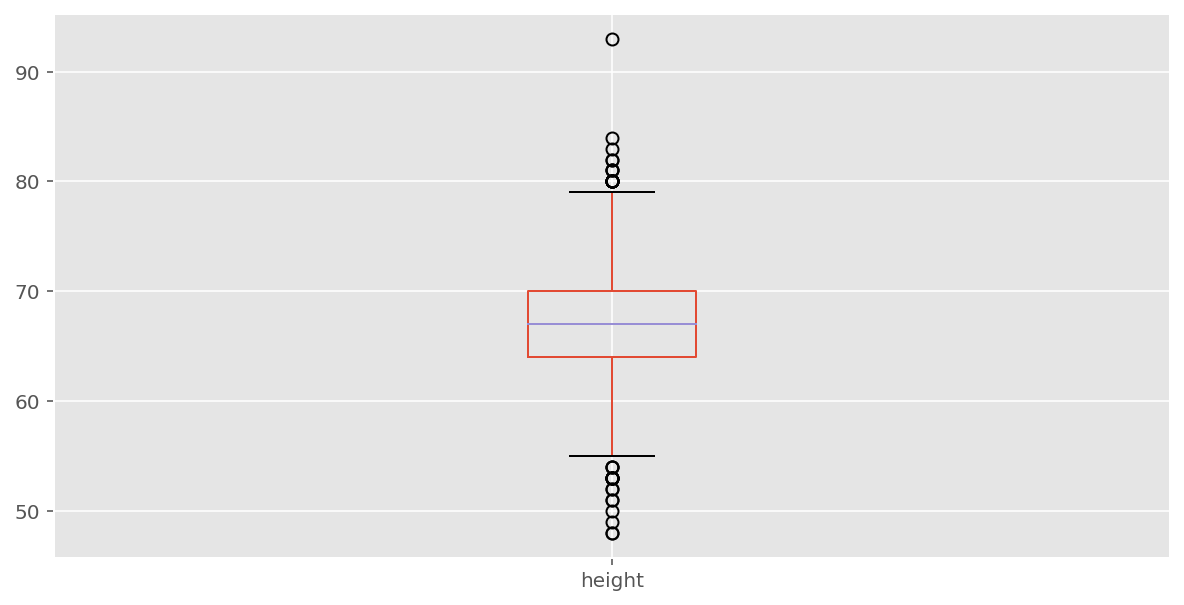

In [33]:
cdc['height'].plot(kind='box')
plt.show(); 

You can compare the locations of the components of the box by examining the summary statistics.

In [34]:
cdc['height'].describe()

count    20000.000000
mean        67.182900
std          4.125954
min         48.000000
25%         64.000000
50%         67.000000
75%         70.000000
max         93.000000
Name: height, dtype: float64

Confirm that the median and upper and lower quartiles reported in the numerical summary match those in the graph. The purpose of a boxplot is to provide a thumbnail sketch of a variable for the purpose of comparing across several categories. So we can, for example, compare the heights of men and women with

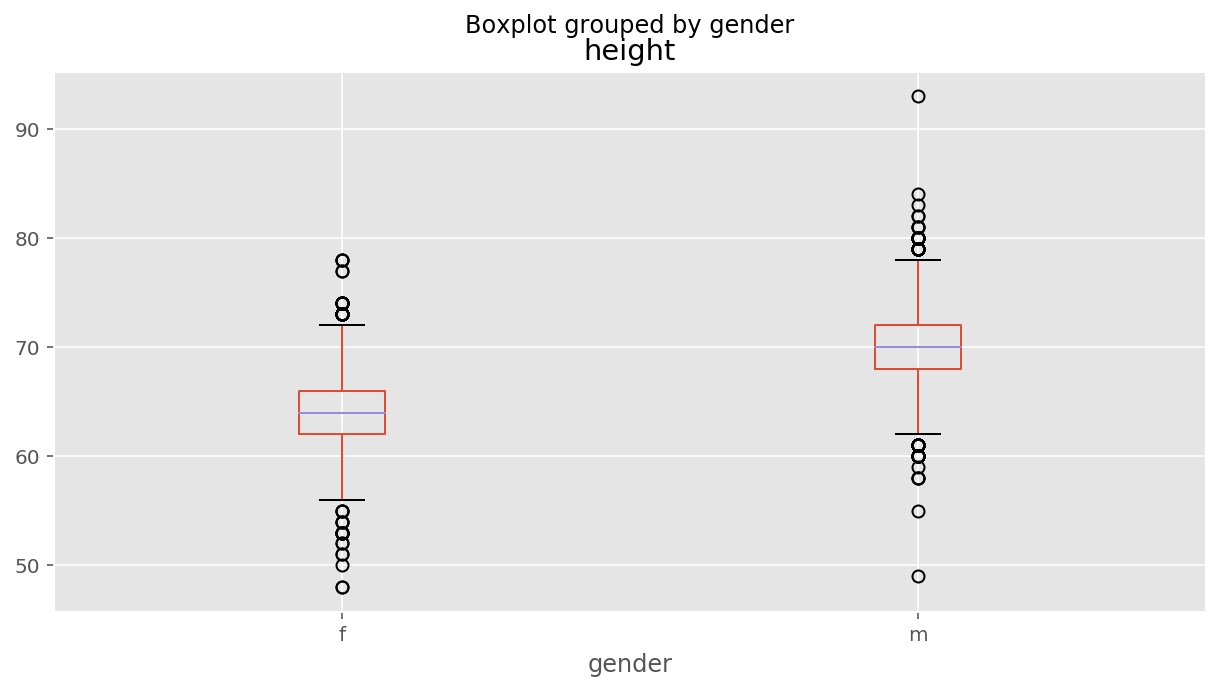

In [35]:
cdc.boxplot(column = 'height', by = 'gender')
plt.show(); 

Instead using matplotlib.pyplot, we can use pandas' `boxplot()` to give us a box plots of heights where the groups are defined by gender.

Next let’s consider a new variable that doesn’t show up directly in this data set: Body Mass Index ([BMI](http://en.wikipedia.org/wiki/Body_mass_index)). BMI is a weight to height ratio and can be calculated as:

In [36]:
from IPython.display import Image
Image(url= 'https://wikimedia.org/api/rest_v1/media/math/render/svg/a25f48e7bcb8270653f7b027e6dce80f0b6fcd90')

703 is the approximate conversion factor to change units from metric (meters and kilograms) to imperial (inches and pounds).

The following two lines first make a new object called `bmi` and then creates box plots of these values using `seaborn` library, defining groups by the variable `genhlth`.

In [37]:
bmi = (cdc['weight'] / (cdc['height'])**2) * 703

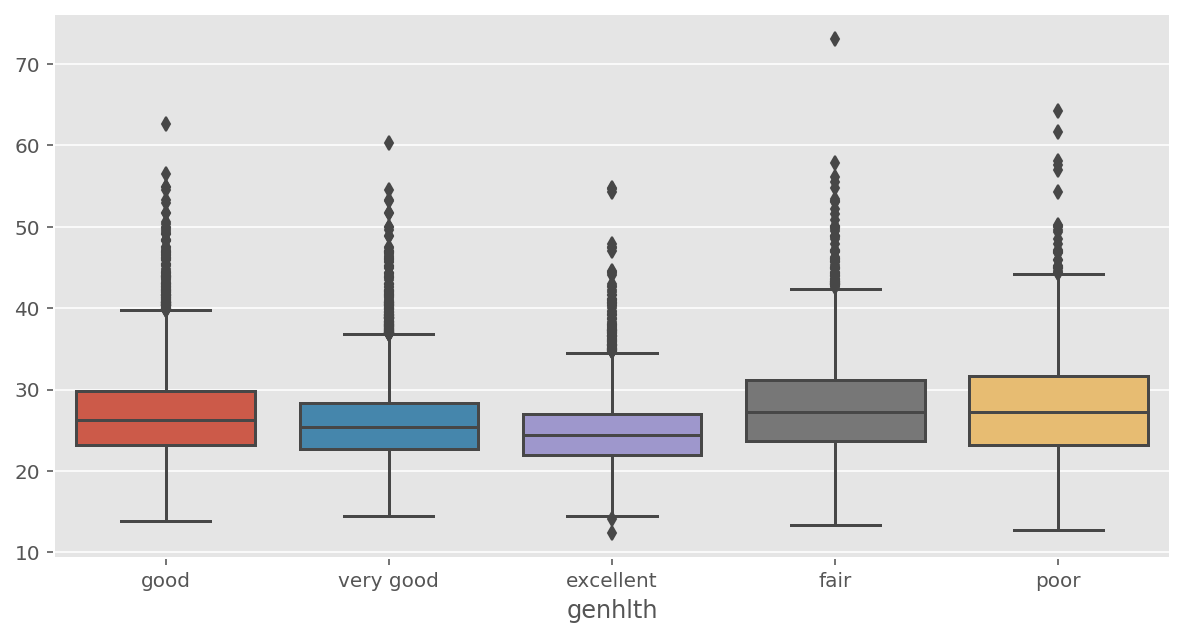

In [38]:
import seaborn as sns
sns.boxplot(x = cdc['genhlth'], y = bmi)
plt.show(); 

Notice that the first line above is just some arithmetic, but it’s applied to all 20,000 numbers in the `cdc` data set. That is, for each of the 20,000 participants, we take their weight, divide by their height-squared and then multiply by 703. The result is 20,000 BMI values, one for each respondent.

<div class = 'exercise'>
<h4>Exercise 5</h4>
What does this box plot show? Pick another categorical variable from the data set and see how it relates to BMI. List the variable you chose, why you might think it would have a relationship to BMI, and indicate what the figure seems to suggest.
</div>

Finally, let's make some histograms. We can look at the histogram for the age of our respondents with the command

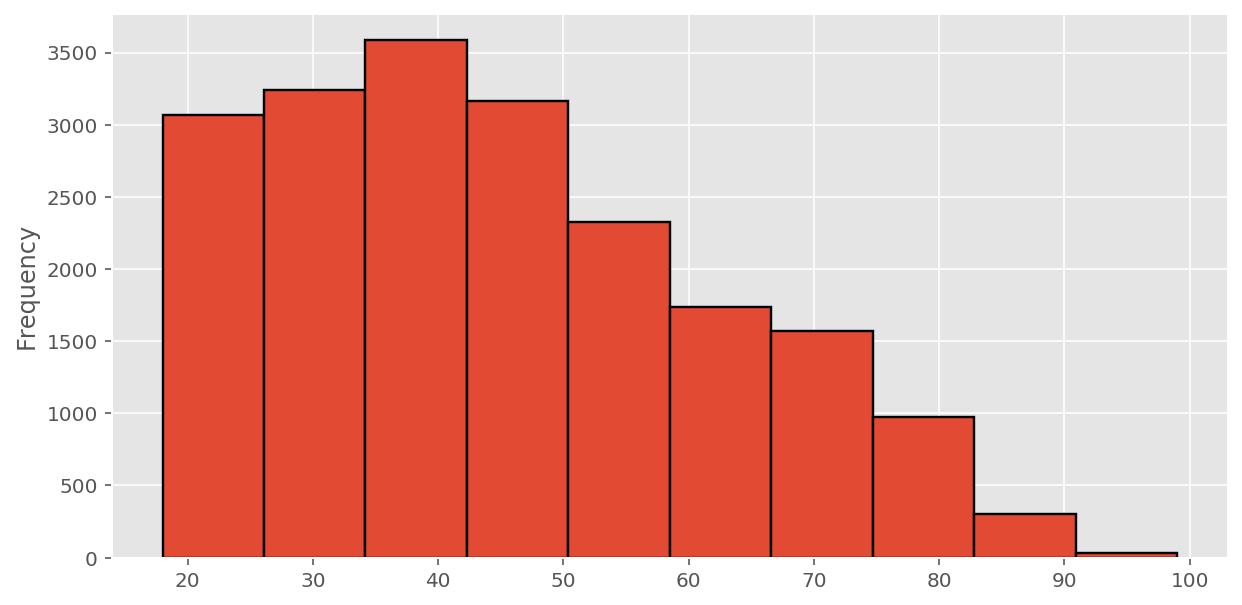

In [39]:
cdc['age'].plot(kind = 'hist', edgecolor = 'black', linewidth = 1.2)
plt.show(); 

Histograms are generally a very good way to see the shape of a single distribution, but that shape can change depending on how the data is split between the different bins. You can control the number of bins by adding an argument to the command. In the next two lines, we first make a default histogram of `bmi` and then one with the bin size of 50.

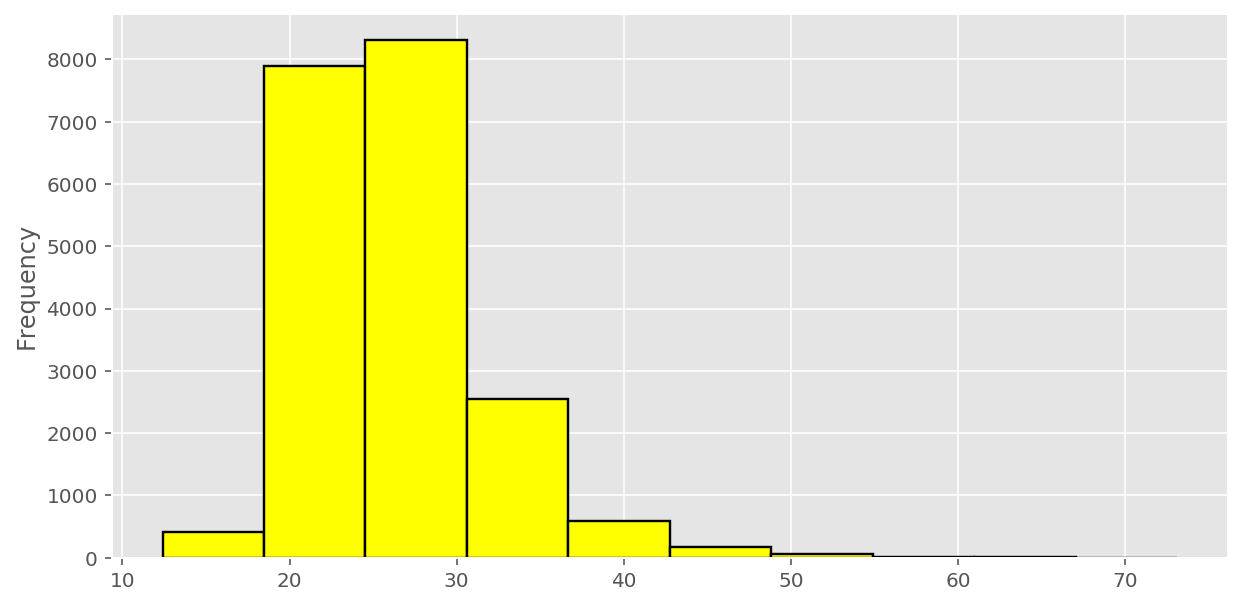

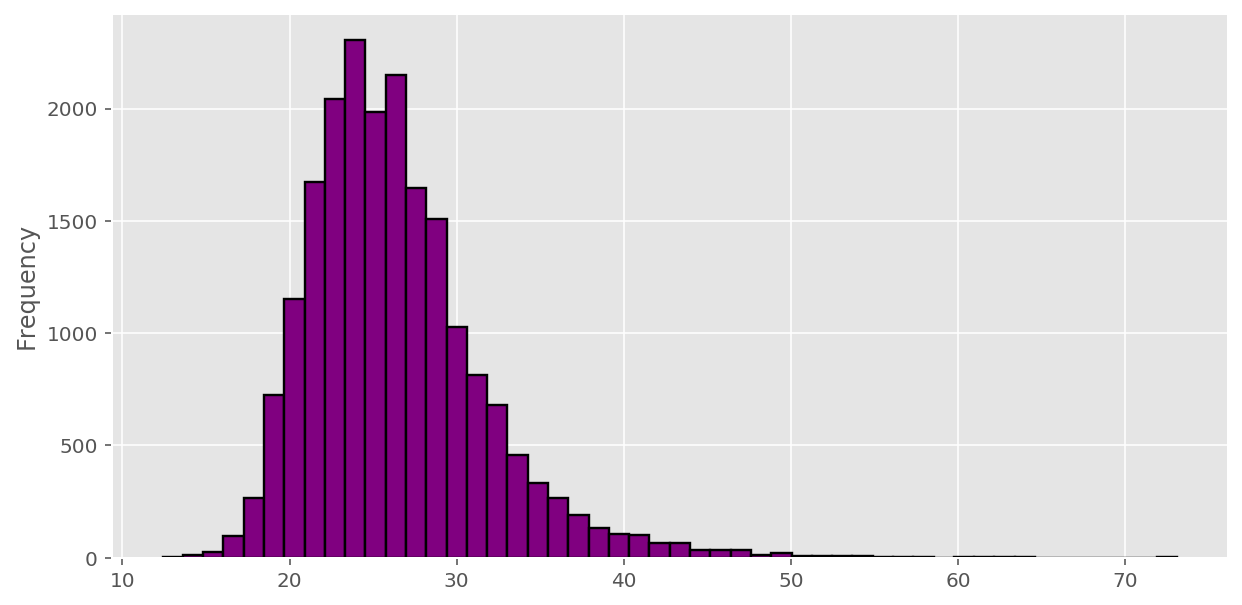

In [40]:
bmi.plot(kind = 'hist', color = 'yellow', edgecolor = 'black', linewidth = 1.2)
plt.show(); 
bmi.plot(kind = 'hist', color = 'purple', edgecolor = 'black', linewidth = 1.2, bins = 50)
plt.show(); 

How do these two histograms compare?

At this point, we've done a good first pass at analyzing the information in the BRFSS questionnaire. We've found an interesting association between smoking and gender, and we can say something about the relationship between people's assessment of their general health and their own BMI. We've also picked up essential computing tools – summary statistics, subsetting, and plots – that will serve us well throughout this course.

<div class = "license">
This lab was adapted by Vural Aksakalli and Imran Ture from OpenIntro by Andrew Bray and Mine Çetinkaya-Rundel.
</div>

***
www.featureranking.com

## On Your Own <a id='onyourown'></a>

1- Make a scatterplot of weight versus desired weight. Describe the relationship between these two variables.

(array([  0., 100., 200., 300., 400., 500., 600., 700., 800.]),
 <a list of 9 Text yticklabel objects>)

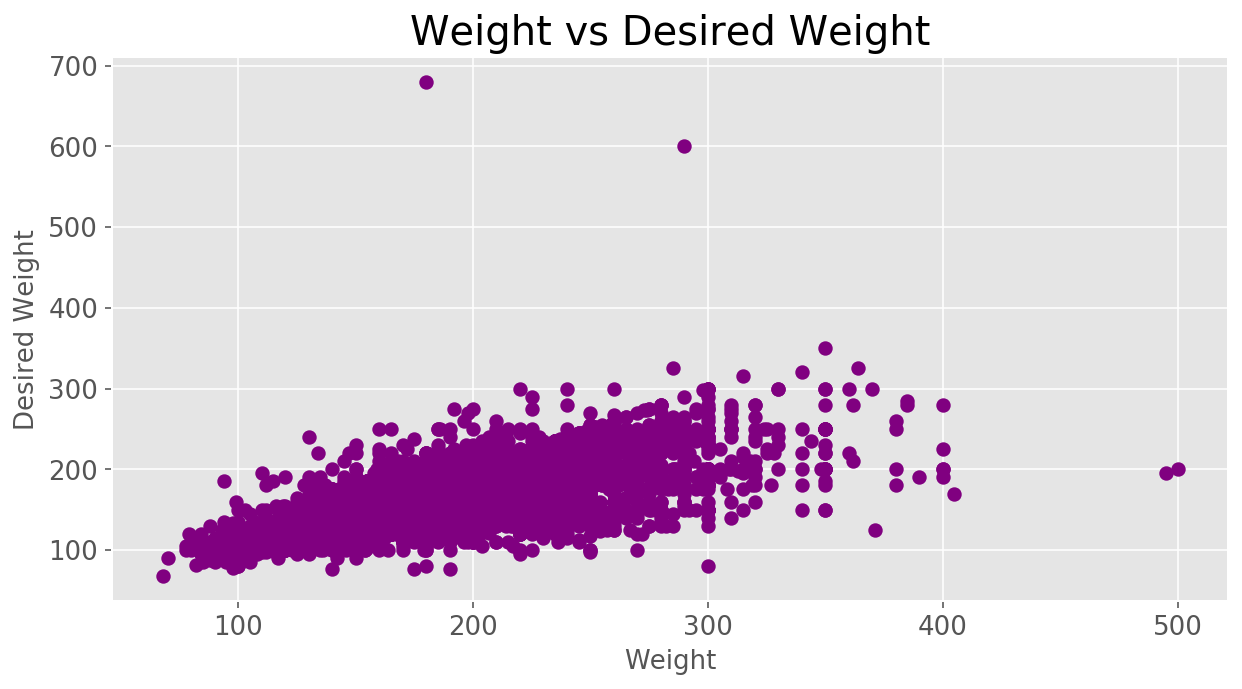

In [41]:
plt.scatter(cdc.weight, cdc.wtdesire, marker='o', color = 'purple', linewidth = 1.2);
plt.title('Weight vs Desired Weight', fontsize=20)
plt.xlabel('Weight', fontsize=13)
plt.ylabel('Desired Weight', fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

There is a linear shape and a strong association. There are few outliers, which may be due to chance or measurement error. 

2- Let’s consider a new variable: the difference between desired weight (<code>wtdesire</code>) and current weight (<code>weight</code>). Create this new variable by subtracting the two columns in the DataFrame and assigning them to a new object called <code>wdiff</code>.

In [42]:
cdc['wdiff'] = cdc.wtdesire - cdc.weight
cdc.head(15)

,genhlth,exerany,hlthplan,smoke100,height,weight,wtdesire,age,gender,wdiff
0,good,0,1,0,70,175,175,77,m,0
1,good,0,1,1,64,125,115,33,f,-10
2,good,1,1,1,60,105,105,49,f,0
3,good,1,1,0,66,132,124,42,f,-8
4,very good,0,1,0,61,150,130,55,f,-20
5,very good,1,1,0,64,114,114,55,f,0
6,very good,1,1,0,71,194,185,31,m,-9
7,very good,0,1,0,67,170,160,45,m,-10
8,good,0,1,1,65,150,130,27,f,-20
9,good,1,1,0,70,180,170,44,m,-10


3- What type of data is <code>wdiff</code>? If an observation <code>wdiff</code> is 0, what does this mean about the person's weight and desired weight. What if <code>wdiff</code> is positive or negative?

In [43]:
cdc['wdiff'].dtype

dtype('int64')

<code>wdiff</code> has discrete, integer values. 
<br>
If an observation <code>wdiff</code> is 0, this mean that the person is at their ideal weight. 
<br>
If it is positive, person's desired weight is larger than their current weight (wants to gain weight). If it is negative, person's desired weight is lower than their current weight (wants to lose weight).

4- Describe the distribution of <code>wdiff</code> in terms of its center, shape, and spread, including any plots you use. What does this tell us about how people feel about their current weight?

Text(0.5, 1.0, 'The Difference Between Desired Weight and Current Weight')

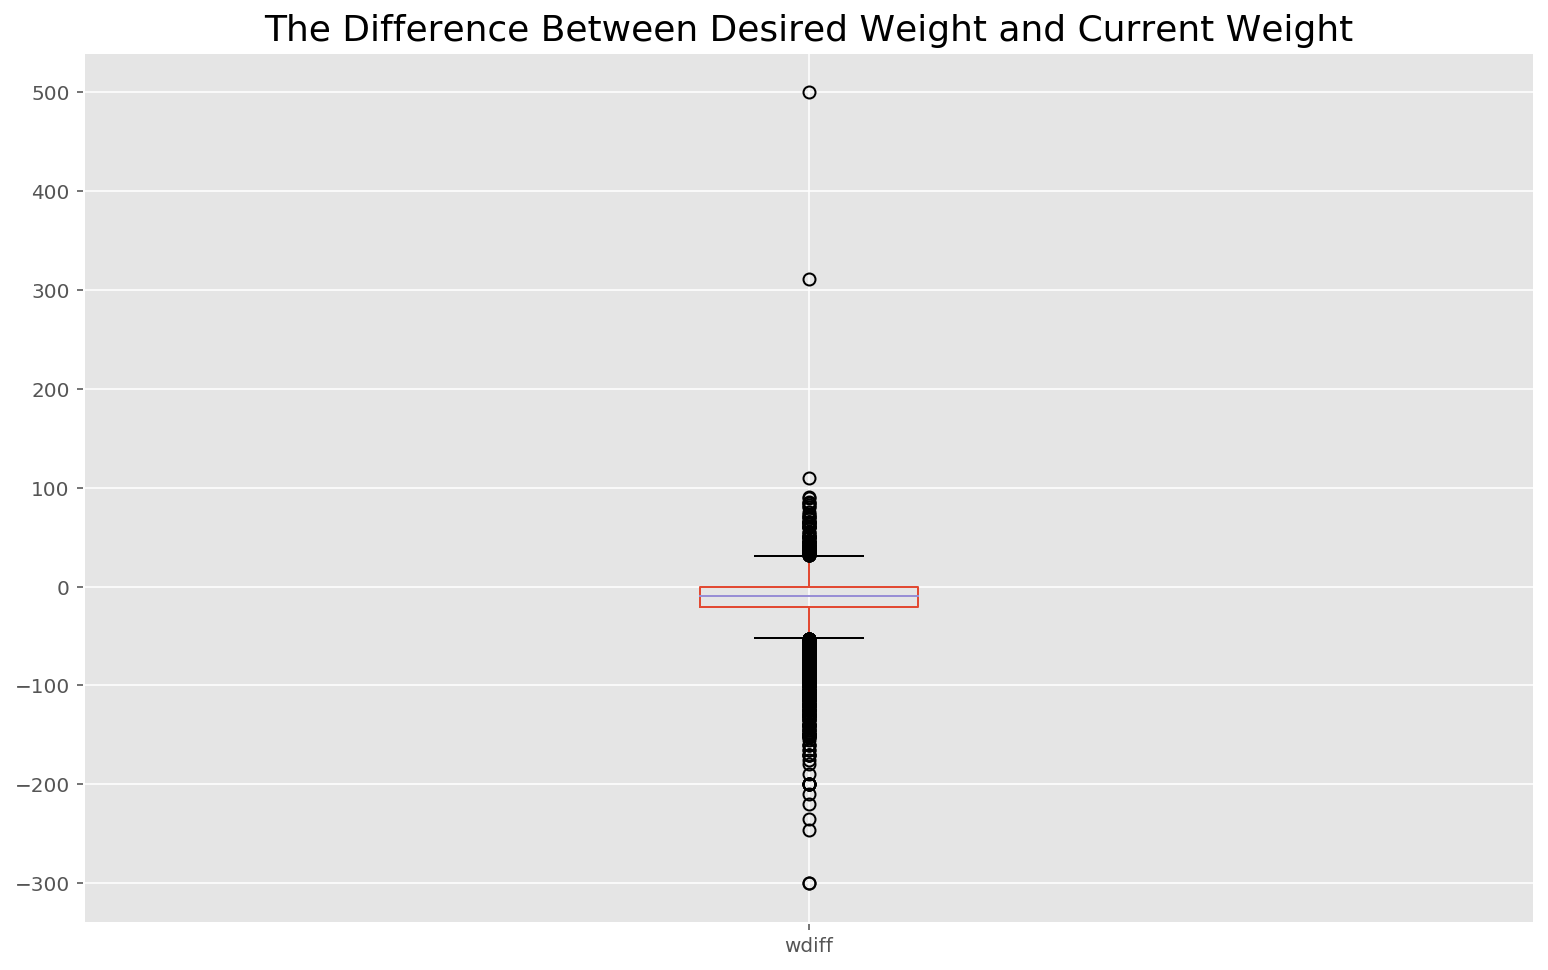

In [44]:
cdc.boxplot(column = 'wdiff', figsize = (13, 8))
plt.title('The Difference Between Desired Weight and Current Weight', fontsize = 18)

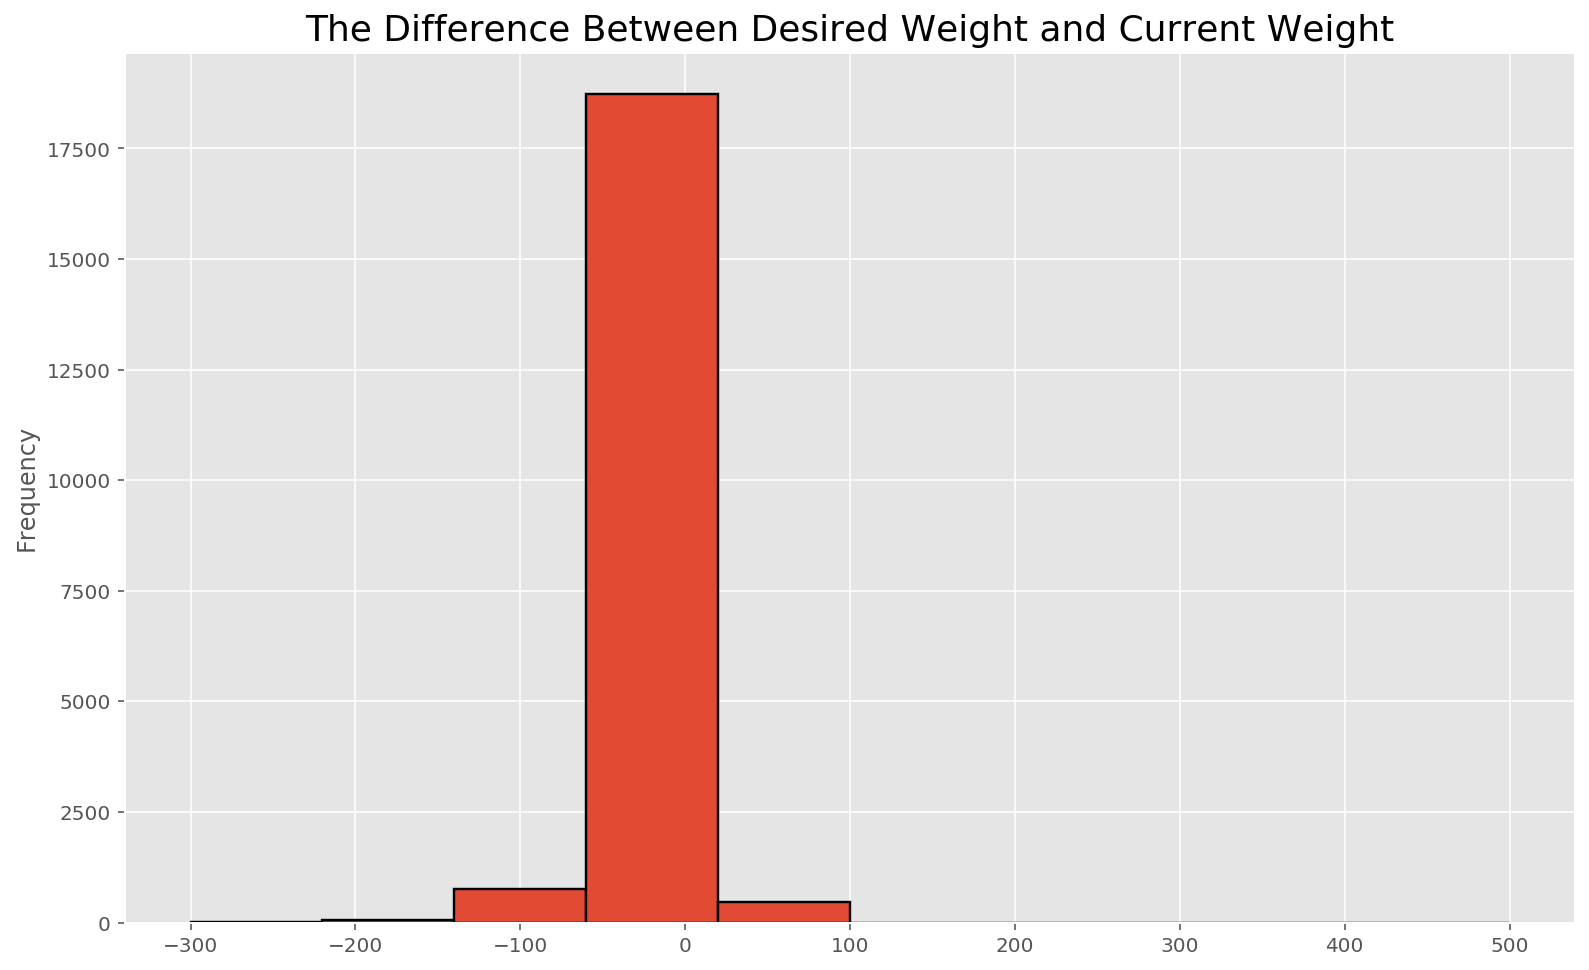

In [45]:
cdc['wdiff'].plot(kind = 'hist', edgecolor = 'black', linewidth = 1.2, figsize=(13, 8))
plt.title('The Difference Between Desired Weight and Current Weight', fontsize = 18)
plt.show(); 

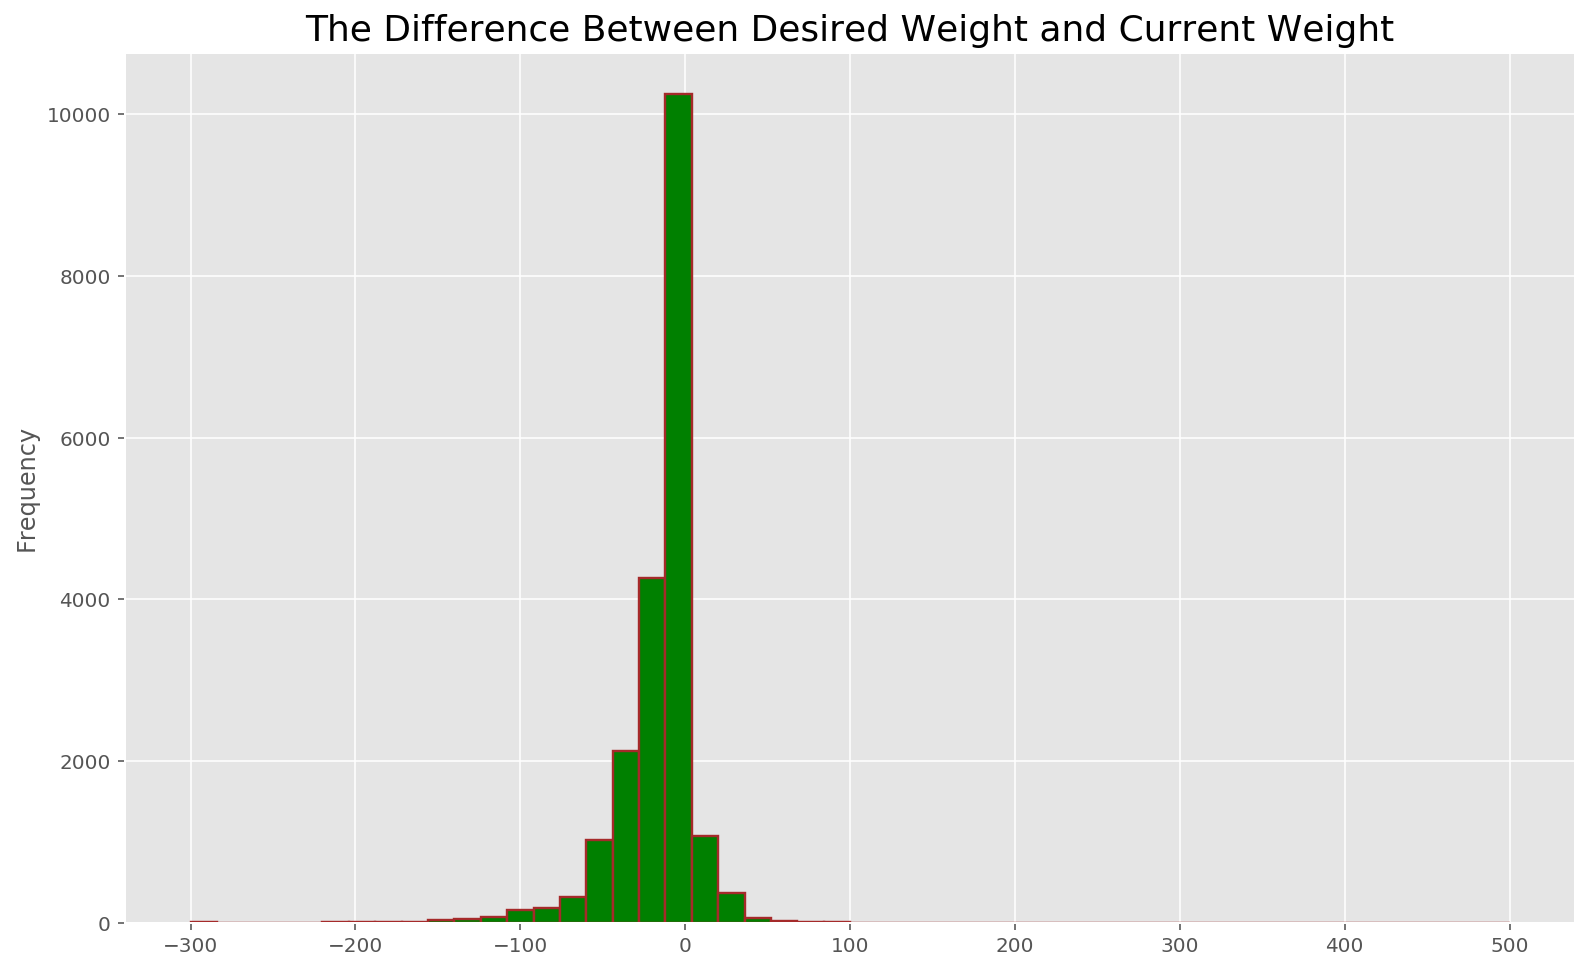

In [46]:
cdc['wdiff'].plot(kind = 'hist', color = 'green', edgecolor = 'brown', linewidth = 1.2, bins = 50, figsize = (13, 8))
plt.title('The Difference Between Desired Weight and Current Weight', fontsize = 18)
plt.show(); 

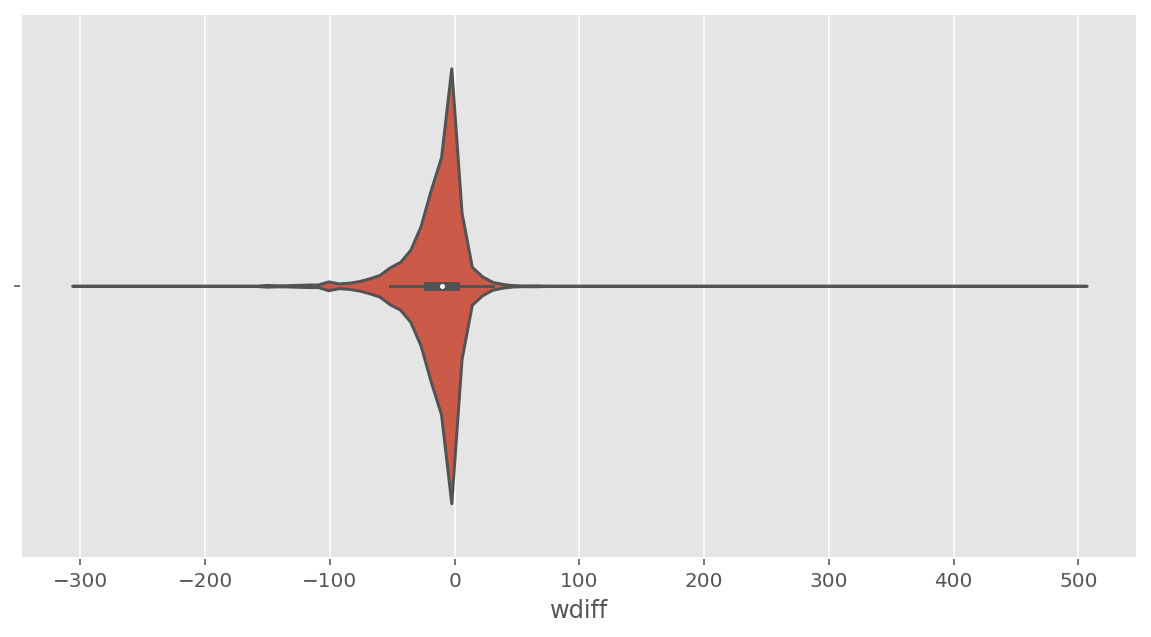

In [47]:
sns.violinplot(x="wdiff", data=cdc)

In [48]:
cdc['wdiff'].describe()

count    20000.000000
mean       -14.589100
std         24.045856
min       -300.000000
25%        -21.000000
50%        -10.000000
75%          0.000000
max        500.000000
Name: wdiff, dtype: float64

Most people desire to lose weight around 10 pounds.
<br>
The histogram is slightly left skewed, which indicates that there are more people who want to lose weight compared to people who want to gain weight.
<br>
The iqr range is between 0 and -21 pounds (which includes the outliers)

5- Using numerical summaries and a side-by-side box plot, determine if men tend to view their weight differently than women.

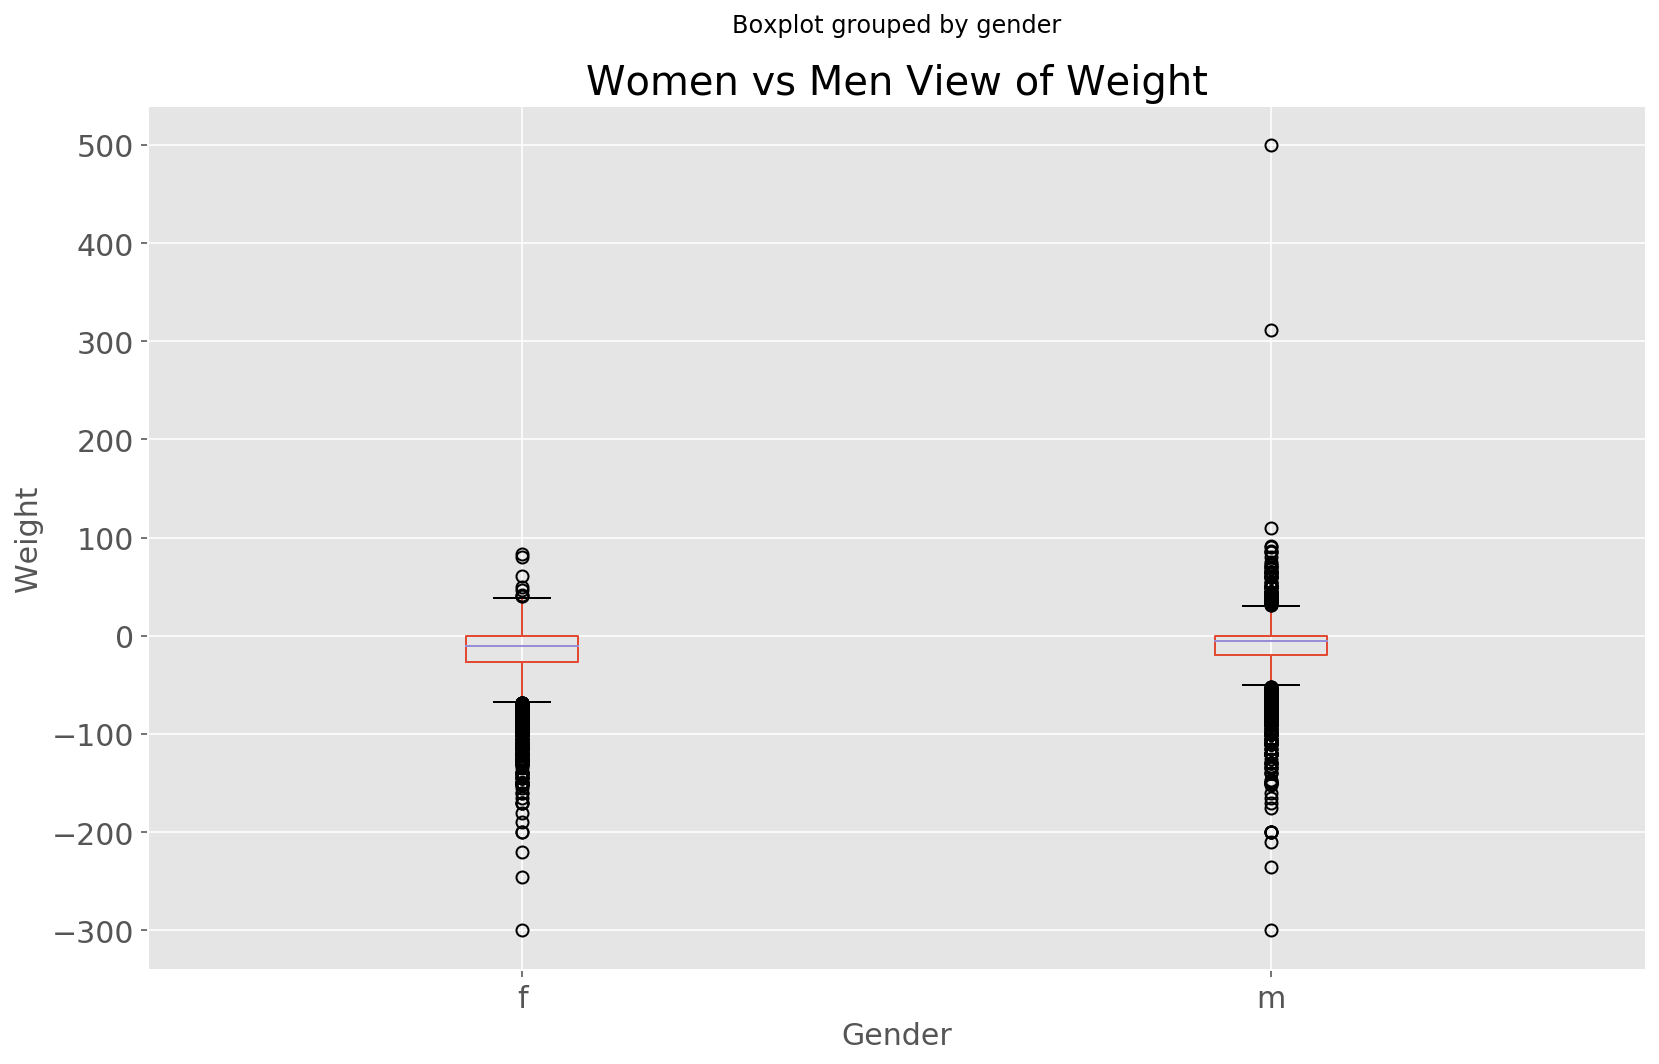

In [49]:
cdc.boxplot(column = 'wdiff', by = 'gender', figsize=(13, 8))
plt.title('Women vs Men View of Weight', fontsize=20)
plt.xlabel('Gender', fontsize=15)
plt.ylabel('Weight', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show(); 

In [50]:
# wdiff for male
m_vs_w = cdc[(cdc['gender'] == 'm') & (cdc['wdiff'])]
m_vs_w['wdiff'].describe()

count    2827.000000
mean      -12.253626
std        23.732446
min      -235.000000
25%       -25.000000
50%       -13.000000
75%        -5.000000
max       311.000000
Name: wdiff, dtype: float64

In [51]:
# wdiff for female
m_vs_w2 = cdc[(cdc['gender'] == 'f') & (cdc['wdiff'])]
m_vs_w2['wdiff'].describe()

count    3279.000000
mean      -19.267155
std        21.473411
min      -165.000000
25%       -25.000000
50%       -15.000000
75%        -5.000000
max        83.000000
Name: wdiff, dtype: float64

In [52]:
from scipy.stats import iqr
iqr(m_vs_w2['wdiff'])

20.0

In [53]:
iqr(m_vs_w['wdiff'])

20.0

There is a little difference between women and men's view on weight. Women want to lose more weight compared to men (female median = -15, male median = -13).<br>
The range of how much women and men want to lose/gain weight is the same (iqr = 20 for both genders). 

6- Now it’s time to get creative. Find the mean and standard deviation of <code>weight</code> and determine what proportion of the weights are within one standard deviation of the mean.

In [54]:
cdc['weight'].mean()

169.68295

In [55]:
cdc['weight'].std()

40.080969967120254

In [56]:
cdc['stdweight'] = cdc['weight'].std()
cdc['meanweight'] = cdc['weight'].mean()
cdc.head(15)

,genhlth,exerany,hlthplan,smoke100,height,weight,wtdesire,age,gender,wdiff,stdweight,meanweight
0,good,0,1,0,70,175,175,77,m,0,40.08097,169.68295
1,good,0,1,1,64,125,115,33,f,-10,40.08097,169.68295
2,good,1,1,1,60,105,105,49,f,0,40.08097,169.68295
3,good,1,1,0,66,132,124,42,f,-8,40.08097,169.68295
4,very good,0,1,0,61,150,130,55,f,-20,40.08097,169.68295
5,very good,1,1,0,64,114,114,55,f,0,40.08097,169.68295
6,very good,1,1,0,71,194,185,31,m,-9,40.08097,169.68295
7,very good,0,1,0,67,170,160,45,m,-10,40.08097,169.68295
8,good,0,1,1,65,150,130,27,f,-20,40.08097,169.68295
9,good,1,1,0,70,180,170,44,m,-10,40.08097,169.68295


In [57]:
cdc['addmeanandstd'] = cdc.meanweight + cdc.stdweight
cdc['diffmeanandstd'] = cdc.meanweight - cdc.stdweight
cdc.head(15)

,genhlth,exerany,hlthplan,smoke100,height,weight,wtdesire,age,gender,wdiff,stdweight,meanweight,addmeanandstd,diffmeanandstd
0,good,0,1,0,70,175,175,77,m,0,40.08097,169.68295,209.76392,129.60198
1,good,0,1,1,64,125,115,33,f,-10,40.08097,169.68295,209.76392,129.60198
2,good,1,1,1,60,105,105,49,f,0,40.08097,169.68295,209.76392,129.60198
3,good,1,1,0,66,132,124,42,f,-8,40.08097,169.68295,209.76392,129.60198
4,very good,0,1,0,61,150,130,55,f,-20,40.08097,169.68295,209.76392,129.60198
5,very good,1,1,0,64,114,114,55,f,0,40.08097,169.68295,209.76392,129.60198
6,very good,1,1,0,71,194,185,31,m,-9,40.08097,169.68295,209.76392,129.60198
7,very good,0,1,0,67,170,160,45,m,-10,40.08097,169.68295,209.76392,129.60198
8,good,0,1,1,65,150,130,27,f,-20,40.08097,169.68295,209.76392,129.60198
9,good,1,1,0,70,180,170,44,m,-10,40.08097,169.68295,209.76392,129.60198


In [58]:
one_std = cdc [(cdc['weight'] < cdc['addmeanandstd']) & (cdc['weight'] > cdc['diffmeanandstd'])]

In [59]:
import pandas as pd
len(one_std)/len(cdc)

0.7076

70.76% of respondents’ weights are within one standard deviation of the mean weight.

## Thank you for reading!